In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

#path = '/content/drive/My Drive/Colab Notebooks/Mini-Projet/sensor_data_processed_normalizing_the_label_with_hot_encoding_index.csv'

path = '/content/drive/My Drive/Colab Notebooks/Mini-Projet/sensor_data_processed_normalizing_the_label_with_hot_encoding_timestamps_normalizing.csv'


In [4]:
data = pd.read_csv(path, index_col='Time',parse_dates=True)

In [5]:
data.head()

,Timestamps,bedroom_switch_middle_left,entrance_heater_effective_setpoint,bedroom_switch_middle_right,kitchen_noise,livingroom_couch_plug_consumption,global_snow_ext,bedroom_heater1_effective_setpoint,global_lighting_power,livingroom_heater2_base_setpoint,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-30 07:58:30,0.000000e+00,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-30 07:58:32,9.126727e-07,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-30 07:58:33,1.369009e-06,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-30 07:58:36,2.738018e-06,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-30 07:58:38,3.650691e-06,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#data.insert(0,'Timestamps',data.index)

In [7]:
#data['Timestamps'] = pd.to_datetime(data['Timestamps'])

In [8]:
#data['Timestamps'] = data['Timestamps'].apply(lambda x: (x - data['Timestamps'].min()) / (data['Timestamps'].max() - data['Timestamps'].min()))


In [9]:
#data.to_csv('sensor_data_processed_normalizing_the_label_with_hot_encoding_timestamps_normalizing', index = True)

In [10]:
training_labels = ['Timestamps','bedroom_switch_middle_left',
 'entrance_heater_effective_setpoint',
 'bedroom_switch_middle_right',
 'kitchen_noise',
 'livingroom_couch_plug_consumption',
 'global_snow_ext',
 'bedroom_heater1_effective_setpoint',
 'global_lighting_power',
 'livingroom_heater2_base_setpoint',
 'kitchen_dishwasher_current',
 'toilet_coldwater_total',
 'kitchen_hood_voltage',
 'kitchen_washingmachine_partial_energy',
 'walkway_switch2_bottom_left',
 'livingroom_shutter5',
 'kitchen_hood_total_energy',
 'bathroom_heater_command',
 'walkway_noise',
 'entrance_noise',
 'livingroom_shutter4',
 'livingroom_switch2_top_left',
 'global_rain_ext',
 'global_wind_speed_ext',
 'global_waterheater_total_energy',
 'global_lighting_current',
 'livingroom_heater2_temperature',
 'livingroom_tv_status',
 'office_tv_plug_consumption',
 'kitchen_fridge_power',
 'bedroom_closet_door',
 'bathroom_luminosity',
 'livingroom_tv_plug_consumption',
 'office_AC_setpoint',
 'bathroom_switch_bottom_right',
 'bedroom_light4',
 'office_heater_effective_mode',
 'global_lighting_total_energy',
 'kitchen_cupboard3',
 'toilet_switch_left',
 'entrance_heater_base_setpoint',
 'office_heater_command',
 'bedroom_light2',
 'livingroom_table_luminosity',
 'global_voltage',
 'bedroom_temperature',
 'kitchen_fridge_door',
 'bathroom_sink_coldwater_total',
 'global_lighting_partial_energy',
 'livingroom_couch_noise',
 'global_temperature_feel_ext',
 'livingroom_humidity',
 'kitchen_oven_current',
 'livingroom_presence_table',
 'bathroom_switch_bottom_left',
 'livingroom_heater1_command',
 'staircase_light',
 'office_noise',
 'kitchen_sink_hotwater_total',
 'bathroom_switch_top_right',
 'bedroom_switch_bottom_left',
 'livingroom_presence_couch',
 'livingroom_heater2_effective_setpoint',
 'bedroom_presence',
 'toilet_switch_right',
 'bedroom_humidity',
 'livingroom_heater1_effective_mode',
 'bedroom_heater2_effective_setpoint',
 'livingroom_heater2_command',
 'bedroom_shutter1',
 'global_active_power',
 'walkway_switch1_bottom_left',
 'kitchen_hood_current',
 'entrance_heater_temperature',
 'bedroom_CO2',
 'livingroom_table_plug_consumption',
 'bathroom_CO2',
 'bathroom_temperature',
 'bedroom_drawer1',
 'office_switch_right',
 'global_heaters_temperature',
 'global_waterheater_current',
 'kitchen_dishwasher_voltage',
 'global_shutters_voltage',
 'walkway_switch1_bottom_right',
 'livingroom_heater1_effective_setpoint',
 'livingroom_light1',
 'bathroom_heater_temperature',
 'kitchen_cooktop_current',
 'entrance_switch_left',
 'toilet_coldwater_instantaneous',
 'kitchen_oven_voltage',
 'bathroom_sink_hotwater_instantaneous',
 'staircase_switch_right',
 'kitchen_sink_coldwater_instantaneous',
 'livingroom_heater2_effective_mode',
 'office_tv_status',
 'global_shutters_current',
 'kitchen_fridge_current',
 'kitchen_washingmachine_total_energy',
 'bedroom_shutter2',
 'bathroom_light2',
 'global_waterheater_partial_energy',
 'global_frequency',
 'kitchen_switch_bottom_right',
 'bedroom_door',
 'kitchen_luminosity',
 'bedroom_heater2_command',
 'entrance_heater_command',
 'global_pressure_ext',
 'kitchen_oven_partial_energy',
 'global_shutters_power',
 'office_luminosity',
 'kitchen_cooktop_total_energy',
 'kitchen_washingmachine_voltage',
 'bathroom_light1',
 'bedroom_luminosity',
 'office_presence',
 'bathroom_heater_effective_setpoint',
 'bathroom_shower_hotwater_instantaneous',
 'livingroom_switch1_top_left',
 'bathroom_humidity',
 'kitchen_cupboard5',
 'bathroom_shower_coldwater_total',
 'bathroom_shower_coldwater_instantaneous',
 'office_window',
 'kitchen_switch_bottom_left',
 'kitchen_dishwasher_partial_energy',
 'kitchen_fridge_voltage',
 'office_heater_effective_setpoint',
 'office_heater_temperature',
 'livingroom_window1',
 'bathroom_sink_hotwater_total',
 'kitchen_cooktop_voltage',
 'kitchen_hood_power',
 'kitchen_sink_hotwater_instantaneous',
 'global_current',
 'global_condition_id_ext',
 'livingroom_switch1_top_right',
 'office_AC_mode',
 'bedroom_heater2_effective_mode',
 'walkway_light',
 'bathroom_door',
 'global_clouds_ext',
 'global_shutters_total_energy',
 'bedroom_heater1_effective_mode',
 'bedroom_light1',
 'kitchen_cupboard1',
 'livingroom_temperature',
 'livingroom_CO2',
 'global_shutters_partial_energy',
 'bathroom_shower_hotwater_total',
 'kitchen_switch_top_right',
 'kitchen_cooktop_partial_energy',
 'global_waterheater_power',
 'kitchen_sink_coldwater_total',
 'kitchen_oven_total_energy',
 'global_power_factor',
 'kitchen_washingmachine_current',
 'global_coldwater_instantaneous',
 'office_desk_plug_consumption',
 'livingroom_switch1_bottom_left',
 'entrance_door',
 'global_active_energy',
 'global_coldwater_total',
 'bathroom_heater_effective_mode',
 'office_light',
 'walkway_switch1_top_right',
 'global_humidity_ext',
 'livingroom_AC_setpoint',
 'walkway_switch2_top_right',
 'bathroom_switch_top_left',
 'kitchen_cupboard2',
 'office_heater_base_setpoint',
 'bedroom_light3',
 'kitchen_dishwasher_total_energy',
 'livingroom_shutter3',
 'kitchen_light2',
 'kitchen_cooktop_power',
 'office_switch_left',
 'toilet_light',
 'livingroom_shutter2',
 'bathroom_presence',
 'livingroom_light2',
 'bedroom_switch_top_right',
 'livingroom_heater1_temperature',
 'bedroom_switch_top_left',
 'walkway_switch1_top_left',
 'livingroom_switch2_top_right',
 'walkway_switch2_bottom_right',
 'kitchen_dishwasher_power',
 'global_heaters_setpoint',
 'bedroom_AC_setpoint',
 'kitchen_temperature',
 'bedroom_heater2_temperature',
 'kitchen_fridge_partial_energy',
 'bedroom_switch_bottom_right',
 'office_shutter',
 'bedroom_drawer2',
 'global_temperature_ext',
 'bedroom_heater1_command',
 'bathroom_heater_base_setpoint',
 'bedroom_bed_pressure',
 'livingroom_table_noise',
 'global_lighting_voltage',
 'office_switch_middle',
 'global_gas_total',
 'global_waterheater_status',
 'office_door',
 'kitchen_washingmachine_power',
 'staircase_switch_left',
 'bedroom_heater2_base_setpoint',
 'entrance_heater_effective_mode',
 'bedroom_heater1_temperature',
 'entrance_light1',
 'livingroom_shutter1',
 'livingroom_heater1_base_setpoint',
 'kitchen_CO2',
 'walkway_switch2_top_left',
 'kitchen_switch_top_left',
 'kitchen_fridge_total_energy',
 'bathroom_shower_door',
 'bedroom_heater1_base_setpoint',
 'kitchen_light1',
 'kitchen_hood_partial_energy',
 'global_waterheater_voltage',
 'kitchen_cupboard4',
 'bathroom_sink_coldwater_instantaneous',
 'bedroom_noise',
 'kitchen_humidity',
 'kitchen_oven_power',
 'kitchen_presence',
 'livingroom_luminosity',
 'E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'down',
 'equal',
 'up',
 'Couvert',
 'brouillard',
 'brume',
 'ensoleillé',
 'légères pluies',
 'nuageux',
 'partiellement ensoleillé',
 'peu nuageux',
 'cloudy',
 'few-showers',
 'fog',
 'mostly-cloudy-day',
 'partly-cloudy-day',
 'sunny']

In [11]:
classes_labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [12]:
X = data[training_labels]

In [13]:
y = data[classes_labels]

In [14]:
y = y.values

In [15]:
X = X.values

In [16]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size = 0.3)

In [18]:
x_train.shape

(268599, 266, 1)

#LSTM Model Building

In [46]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout, InputLayer, SimpleRNN
from keras.optimizers import RMSprop, SGD, Adam

import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_CUDNN'] = '1'

from keras.layers import CuDNNLSTM



# hyper-parameters
num_classes = 25
input_shape = (x_train.shape[1],)
hidden_nodes= (x_train.shape[1]+num_classes)/2
input_nodes = x_train.shape[1]

model = Sequential()
# first layer with 
model.add(InputLayer((len(training_labels), 1)))
model.add(Dense(int(input_nodes), activation='tanh'))


#model.add(LSTM(int(input_nodes), activation='tanh', return_sequences=True))
model.add(LSTM(int(input_nodes), activation='tanh'))
#model.add(LSTM(int(hidden_nodes), activation='tanh'))

# Dropout of 50%
model.add(Dropout(0.5))

# L
model.add(Dense(hidden_nodes, activation='tanh'))

#model.add(Dense(int(hidden_nodes/2), activation='tanh'))


# Classification Layer 
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 266, 266)          532       
                                                                 
 lstm_5 (LSTM)               (None, 266)               567112    
                                                                 
 dropout_4 (Dropout)         (None, 266)               0         
                                                                 
 dense_9 (Dense)             (None, 145)               38715     
                                                                 
 dense_10 (Dense)            (None, 25)                3650      
                                                                 
Total params: 610,009
Trainable params: 610,009
Non-trainable params: 0
_________________________________________________________________


In [47]:
sgd = SGD(learning_rate=0.05,  momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [48]:
batch_size = 34
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
7900/7900 [==============================] - 211s 26ms/step - loss: 1.4467 - accuracy: 0.6663 - val_loss: 0.7342 - val_accuracy: 0.7624
Epoch 2/10
7900/7900 [==============================] - 210s 27ms/step - loss: 0.4667 - accuracy: 0.8581 - val_loss: 0.3364 - val_accuracy: 0.8980
Epoch 3/10
7900/7900 [==============================] - 210s 27ms/step - loss: 0.3096 - accuracy: 0.9047 - val_loss: 0.3301 - val_accuracy: 0.8738
Epoch 4/10
7900/7900 [==============================] - 210s 27ms/step - loss: 0.2454 - accuracy: 0.9199 - val_loss: 0.2049 - val_accuracy: 0.9322
Epoch 5/10
7900/7900 [==============================] - 211s 27ms/step - loss: 0.2128 - accuracy: 0.9285 - val_loss: 0.1890 - val_accuracy: 0.9375
Epoch 6/10
7900/7900 [==============================] - 210s 27ms/step - loss: 0.1925 - accuracy: 0.9342 - val_loss: 0.1587 - val_accuracy: 0.9444
Epoch 7/10
7900/7900 [==============================] - 209s 27ms/step - loss: 0.1812 - accuracy: 0.9399 - val_loss: 0

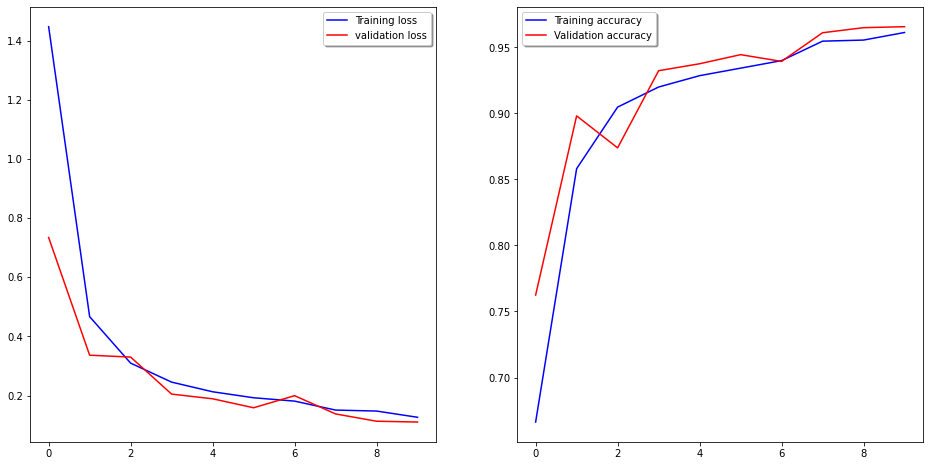

In [49]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11047819256782532
Test accuracy: 0.965542197227478


In [51]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11575139313936234
Test accuracy: 0.9643211960792542


In [52]:
# Classification
y_pred = model.predict(x_test)

y_pred

2519/2519 [==============================] - 20s 8ms/step


array([[2.5298689e-03, 4.9261243e-06, 2.2572614e-04, ..., 4.2213588e-03,
        5.8254969e-05, 7.9429615e-03],
       [4.1832915e-05, 7.9196707e-07, 9.9853278e-06, ..., 3.2851960e-06,
        1.1490674e-07, 5.1476025e-05],
       [2.5096295e-05, 5.2172372e-06, 1.9308511e-04, ..., 6.9070223e-04,
        2.8446400e-05, 1.7009951e-02],
       ...,
       [6.8553097e-09, 3.9564219e-07, 2.3188218e-07, ..., 2.6111786e-06,
        1.6344522e-07, 2.1097134e-05],
       [1.3166813e-05, 1.8200577e-06, 7.8974139e-05, ..., 3.8428803e-05,
        1.6573023e-05, 6.4712189e-02],
       [5.7790967e-06, 1.3750429e-04, 5.6605582e-05, ..., 6.4552524e-03,
        5.5983447e-04, 5.0422912e-03]], dtype=float32)

In [53]:

for i in range(0,len(y_pred)):
# Get the index of the maximum value in the output list
  max_index = np.argmax(y_pred[i])
  # Create a binary vector with the maximum value as 1 and other values as 0
  y_pred[i] = np.zeros(len(y_pred[i]))

  y_pred[i][max_index] = 1
     

In [54]:
labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [55]:
df_pred = pd.DataFrame( y_pred,columns=labels)

In [56]:
df_pred

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80578,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
original_array_pred = df_pred.idxmax(axis=1)

In [58]:
original_array_pred


0             Living_room|Eating
1                Bedroom|Reading
2             Living_room|Eating
3               Office|Computing
4               Office|Computing
                  ...           
80575           Office|Computing
80576    Living_room|Watching_TV
80577           Office|Computing
80578           Bedroom|Dressing
80579          Entrance|Entering
Length: 80580, dtype: object

In [59]:

df_test = pd.DataFrame( y_test,columns=labels)
original_array_test = df_test.idxmax(axis=1)
original_array_test

0             Living_room|Eating
1                Bedroom|Reading
2             Living_room|Eating
3               Office|Computing
4               Office|Computing
                  ...           
80575           Office|Computing
80576    Living_room|Watching_TV
80577           Office|Computing
80578            Bedroom|Reading
80579          Entrance|Entering
Length: 80580, dtype: object

In [60]:
cm = confusion_matrix(original_array_test,original_array_pred)

In [61]:
df_cm = pd.DataFrame( cm,columns=labels, index=labels)

In [62]:
df_cm

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
Bathroom|Cleaning,66,0,41,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
Bathroom|Showering,0,2612,40,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,4
Bathroom|Using_the_sink,18,226,663,0,1,0,0,0,0,0,...,4,0,0,0,0,0,1,3,1,3
Bathroom|Using_the_toilet,7,0,32,211,0,0,0,0,0,0,...,0,0,0,0,3,2,0,0,0,5
Bedroom|Cleaning,0,0,0,0,39,0,0,0,0,0,...,4,5,0,0,0,0,0,0,0,0
Bedroom|Dressing,0,0,0,0,2,255,11,1,0,0,...,12,9,0,0,0,0,0,2,2,15
Bedroom|Napping,0,0,0,0,0,14,3041,0,0,0,...,24,5,0,0,0,0,0,3,2,8
Bedroom|Reading,0,0,0,0,1,39,0,3163,0,0,...,0,0,0,0,0,0,0,0,0,0
Entrance|Entering,0,1,0,0,0,0,0,0,126,176,...,0,0,0,0,0,0,0,1,0,13
Entrance|Leaving,0,0,0,0,0,0,0,0,13,165,...,1,0,0,0,0,0,0,0,0,10


In [63]:
df_cm.to_csv("confusion_matrix_LSTM.csv",index=True)
